This code is based on official tutorial: https://github.com/nbody6ppgpu/Nbody6PPGPU-beijing/blob/stable/examples/readhdf5.ipynb

In [1]:
from utils.hdf5file import NBodySnapshot

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
snap = NBodySnapshot('nbody6++jgb_exp/N5000_MA_0206_v2/snap.40_0.h5part')
it = iter(snap)
snap = next(it)
print(f"Loaded: N={snap.scalars['N']}, NPAIRS={snap.scalars['NPAIRS']}")

Loaded: N=4999.0, NPAIRS=0.0


In [4]:
print(f"Loaded: N={int(snap.scalars['N']):d}, NPAIRS={int(snap.scalars['NPAIRS']):d}, N_SINGLE={int(snap.scalars['N_SINGLE']):d}, "
      f"N_BINARY={int(snap.scalars['N_BINARY']):d}, N_MERGER={int(snap.scalars['N_MERGER']):d}")
print(f"Scale coefficients: RBAR={snap.scalars['RBAR']:.2f}[pc], ZMBAR={snap.scalars['ZMBAR']:.2f}[Msun], "
      f"VSTAR={snap.scalars['VSTAR']:.2f}[km/s], TSCALE={snap.scalars['TSCALE']:.2f}[Myr]")

Loaded: N=4999, NPAIRS=0, N_SINGLE=4999, N_BINARY=0, N_MERGER=0
Scale coefficients: RBAR=17.13[pc], ZMBAR=61653.99[Msun], VSTAR=3.93[km/s], TSCALE=4.27[Myr]


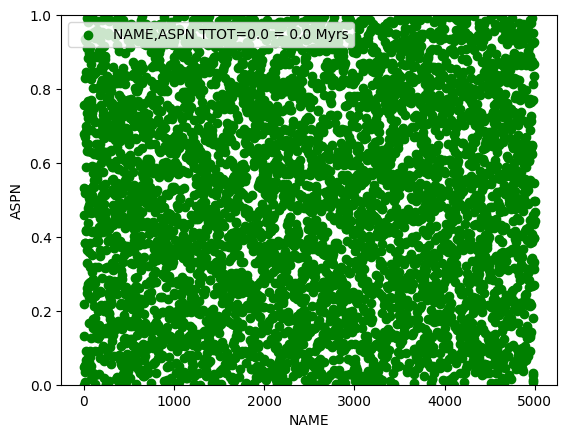

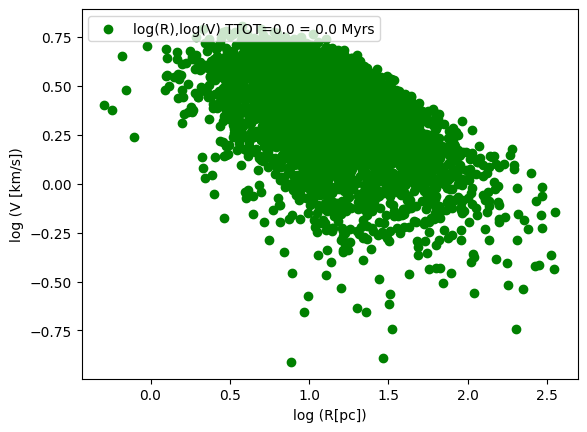

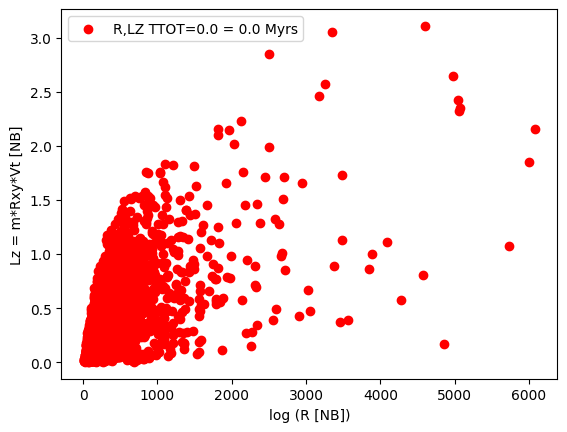

In [5]:
time_string = f"TTOT={snap.scalars['TTOT']} = {int(100.*snap.scalars['TTOT']*snap.scalars['TSCALE'])/100} Myrs"

lbl = f"NAME,ASPN {time_string}"
plt.scatter(snap.Name, snap.ASPN,c="g", label=lbl)
plt.xlabel("NAME")
plt.ylabel("ASPN")
plt.ylim(0, 1)
plt.legend(loc='upper left')
plt.show()

lbl = f"log(R),log(V) {time_string}"
plt.scatter(np.log10(abs(snap.RR)+1.e-02), np.log10(abs(snap.VV+1.e-02)), c="g", label=lbl)
#plt.scatter(NAME, np.log10(abs(RR+1.e-02)), c="g", label="NAME,log(V)")
#plt.xlabel("R [pc]")
plt.xlabel("log (R[pc])")
plt.ylabel("log (V [km/s])")
plt.legend(loc='upper left')
plt.show()

lbl = f"R,LZ {time_string}"
# to get back N-body units multiply with scaling constants
plt.scatter(snap.RR*snap.scalars["RBAR"], snap.LZ_spec/(snap.scalars['RBAR']*snap.scalars['VSTAR']), c="r", label=lbl)
plt.xlabel("log (R [NB])")
plt.ylabel("Lz = m*Rxy*Vt [NB]")
plt.legend(loc='upper left')
plt.show()